In [1]:
using Plots

# Simulating a stochastic process

First, we create a `step` function that simulates one step.

In [2]:
function step(x_tm1)
    x_t = x_tm1 + rand([0,1])
    return x_t
end

step (generic function with 1 method)

Next, the `simulate` function calls `step` repeatedly and saves the results as a history.

In [5]:
function simulate(step; n_steps=100, x_0=0)
    history = Int[x_0] # first create an array to hold the history of outcomes (preallocation is not as important in Julia)
    for _ in 1:n_steps
        # for each step generate the next outcome and store it
        x_t = history[end]
        x_tp1 = step(x_t)
        push!(history, x_tp1)
    end
    return history
end

simulate (generic function with 1 method)

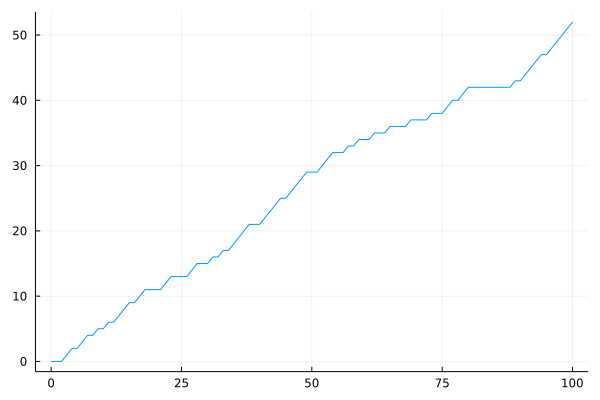

In [19]:
history = simulate(step)
plot(0:length(history)-1, history, label=nothing)

histories = [simulate(step, n_steps = n) for _ = 1:10] = [[0, 0, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9], [0, 1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 9, 10, 11, 11], [0, 0, 0, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7, 8, 8, 8, 8, 9, 9, 9], [0, 0, 0, 1, 2, 2, 3, 4, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9], [0, 0, 0, 0, 1, 1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8], [0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 6, 7, 7, 8, 9], [0, 0, 1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9, 9, 10, 11, 11], [0, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 16], [0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12, 13], [0, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11]]


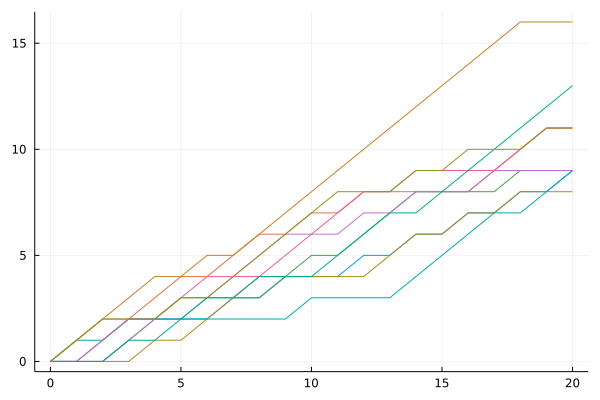

In [20]:
n = 20
@show histories = [simulate(step, n_steps=n) for _ in 1:10]
plot(0:n, histories, label=nothing)